# Comparative Sequence Analysis of Covid-19 with MERs and SARs (Utilizing Biopython)

In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Bio.Seq import Seq

In [3]:
seq1 = Seq('ACTGCA')
seq2 = Seq('ACT')

## GC Contents in DNA

GC-content represents the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C)

## Why GC content is useful 

In polymerase chain reaction (PCR) experiemnts, the GC-content of short oligonucleotides, also known as primers is often used to pridect their annealing temperature to the template DNA. 

A higher GC-content level displays a higher melting temperature while a DNA with low GC-content is less stable than DNA with high GC-content

In [4]:
# Checking GC content of sequences using Biopython 
from Bio.SeqUtils import GC

In [5]:
GC(seq1) # counting percentages of GC content in a sequence 

50.0

In [7]:
seq1.count('C') # able to count the amount of C and G in a sequence 

2

In [12]:
# Creating a function to indicate the percentage of GC content 
def gc_content(seq):
    result = float(seq.count('G') + seq.count('C'))/len(seq) * 100
    return result

In [15]:
gc_content(seq1)

0.5

In [17]:
# Another method of counting gc content 
def gc_content2(seq):
    gc_count = [ N for N in seq if N in 'GC']
    result = float(len(gc_count))/len(seq) * 100
    return result

In [18]:
gc_content2(seq1)

50.0

In [22]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [19]:
seq1

Seq('ACTGCA')

In [20]:
seq2

Seq('ACT')

In [23]:
alignments = pairwise2.align.globalxx(seq1,seq2)

In [24]:
print(alignments)

[Alignment(seqA='ACTGCA', seqB='ACT---', score=3.0, start=0, end=6)]


In [26]:
print(format_alignment(*alignments[0])) # looking at the alignments between seq1 and seq2

ACTGCA
|||   
ACT---
  Score=3



In [28]:
# Seeing all the alignments present in the seqeunces 
for a in alignments:
    print(format_alignment(*a))

ACTGCA
|||   
ACT---
  Score=3



In [29]:
# Only getting the alignment score without the graphical display 
alignment2 = pairwise2.align.globalxx(seq1,seq2,score_only=True,one_alignment_only=True)

In [30]:
alignment2

3.0

In [32]:
# Checking for similarity of similarity present in two different sequence
alignment2/len(seq1)

0.5

# Hamming Distance - hamming distance bewteen two strings of equal length is the number of positions at which the corresponding symbols are different 

### It is used to quantify the similarity of DNA sequences, used for error detection or error correction and it measures the minimum number of substituations require to change on string into another, or the minimum number of errors that could have transformed one string into another

In [33]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [34]:
hamming_distance(seq1,seq2) 

0

In [36]:
hamming_distance('ACCTA','ACTTA') # displays one different in nucleotide 

1

# Dot Plots

### Dotplots are useful as it allows the visually inspection of sequences for the following: direct or inverted repeats, regions with low sequence complexity, similar regions, repeated sequences, sequence rearrangements, RNA structures and gene order 

In [37]:
# Link :https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [38]:
dotplot(seq1,seq2) # displays a graph that indicates which nucleotide matches with which nucleotides 

 |ACT
-----
A|■  
C| ■ 
T|  ■
G|   
C| ■ 
A|■  


In [41]:
#  Identical proteins will obviously have a diagonal line in the center of the matrix. 
dotplot(Seq('ACCTAG'),Seq('ACCTAG'))

 |ACCTAG
--------
A|■   ■ 
C| ■■   
C| ■■   
T|   ■  
A|■   ■ 
G|     ■


In [39]:
import matplotlib.pyplot as plt
import numpy as np

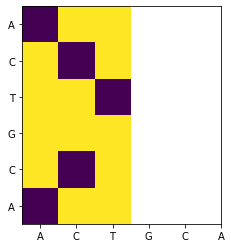

In [44]:
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [90]:
# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

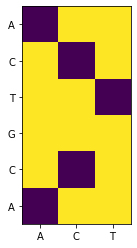

In [47]:
dotplotx(seq1,seq2)

## Comparative Analysis of Covid,SARs,MERs, and EBola

* Covid19(SARS-CoV2) is a novel coronavirus identified as the cause of coronavirus disease 2019 (COVID-19) that began in Wuhan, China in late 2019 and spread worldwide.
* MERS(MERS-CoV) was identified in 2012 as the cause of Middle East respiratory syndrome (MERS).
* SARS(SARS-CoV) was identified in 2002 as the cause of an outbreak of severe acute respiratory syndrome (SARS).

In [48]:
# Importing pkgs to work with sequences in fasta file format
from Bio import SeqIO

In [50]:
covid = SeqIO.read("covid19_NC_045512.2_sequence.fasta", "fasta")
mers = SeqIO.read("mers_sequence.fasta","fasta")
sars = SeqIO.read("sars_sequence.fasta","fasta")
ebola = SeqIO.read("ebola_sequence.fasta","fasta")

In [52]:
# Getting the sequences 
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq
ebola_seq = ebola.seq

In [53]:
# Checking the length of each sequence present 
print("len of covid_seq:", len(covid_seq))
print("len of mers_seq:", len(mers_seq))
print("len of sars_seq:", len(sars_seq))
print("len of ebola_seq:", len(ebola_seq))

len of covid_seq: 29903
len of mers_seq: 30119
len of sars_seq: 29751
len of ebola_seq: 18959


In [54]:
 # Checking the GC content
from Bio.SeqUtils import GC

In [55]:
print("GC of covid_seq:", GC(covid_seq))
print("GC of mers_seq:", GC(mers_seq))
print("GC of sars_seq:", GC(sars_seq))
print("GC of ebola_seq:", GC(ebola_seq))

GC of covid_seq: 37.97277865097148
GC of mers_seq: 41.23642883229855
GC of sars_seq: 40.7616550704178
GC of ebola_seq: 41.07284139458832


### Narrative 
+ The most stable DNA is Mers, ebola, sars and covid 19

In [56]:
# Translate the sequences into protein 
covid_protein = covid.seq.translate()
mers_protein = mers.seq.translate()
sars_protein = sars.seq.translate()
ebola_protein = ebola.seq.translate()

/Users/elvisyung/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [61]:
# Converting nucleotides into amino acids (codons, pairs of 3)
from Bio.SeqUtils import seq3

In [62]:
seq3(covid_protein)

'IleLysGlyLeuTyrLeuProArgTerGlnThrAsnGlnLeuSerIleSerCysArgSerValLeuTerThrAsnPheLysIleCysValAlaValThrArgLeuHisAlaTerCysThrHisAlaValTerLeuIleThrAsnTyrCysArgTerGlnAspThrSerAsnSerSerIlePheCysArgLeuLeuThrValSerSerValLeuGlnProIleIleSerThrSerArgPheArgProGlyValThrGluArgTerAspGlyGluProCysProTrpPheGlnArgGluAsnThrArgProThrGlnPheAlaCysPheThrGlySerArgArgAlaArgThrTrpLeuTrpArgLeuArgGlyGlyGlyLeuIleArgGlyThrSerThrSerTerArgTrpHisLeuTrpLeuSerArgSerTerLysArgArgPheAlaSerThrTerThrAlaLeuCysValHisGlnThrPheGlyCysSerAsnCysThrSerTrpSerCysTyrGlyTerAlaGlySerArgThrArgArgHisSerValArgSerTerTrpTerAspThrTrpCysProCysProSerCysGlyArgAsnThrSerGlyLeuProGlnGlySerSerSerTerGluArgTerTerArgSerTrpTrpProTerLeuArgArgArgSerLysValIleTerLeuArgArgArgAlaTrpHisTerSerLeuTerArgPheSerArgLysLeuGluHisTerThrTerGlnTrpCysTyrProTerThrHisAlaTerAlaTerArgArgGlyIleHisSerLeuCysArgTerGlnLeuLeuTrpProTerTrpLeuProSerTerValHisTerArgProSerSerThrCysTrpTerSerPheMetHisPheValArgThrThrGlyLeuTyrTerHisTerGluGlyCysIleLeuLeuProTerThrTerAlaTerAsnCysLeuValHisGlyThrPhe

### Checking for the number of amino acids present 

In [63]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [73]:
covid_analysed = ProteinAnalysis(str(covid_protein))
sars_analysed = ProteinAnalysis(str(sars_protein))
mers_analysed = ProteinAnalysis(str(mers_protein))
ebola_analysed = ProteinAnalysis(str(ebola_protein))

In [67]:
dir(covid_analysed)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_weight_list',
 'amino_acids_content',
 'amino_acids_percent',
 'aromaticity',
 'charge_at_pH',
 'count_amino_acids',
 'flexibility',
 'get_amino_acids_percent',
 'gravy',
 'instability_index',
 'isoelectric_point',
 'length',
 'molar_extinction_coefficient',
 'molecular_weight',
 'monoisotopic',
 'protein_scale',
 'secondary_structure_fraction',
 'sequence']

In [68]:
# Counting the number of amino acids present in the sequence
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [69]:
# Frequency of Amino Acids Present 
from collections import Counter 

In [75]:
covid_freq = Counter(covid_protein)
sars_freq = Counter(sars_protein)
mers_freq = Counter(mers_protein)
ebola_freq = Counter(ebola_protein)

In [71]:
covid_freq

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [72]:
# Most common amino acid in Covid
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [74]:
sars_analysed.count_amino_acids()

{'A': 575,
 'C': 313,
 'D': 320,
 'E': 365,
 'F': 437,
 'G': 438,
 'H': 298,
 'I': 566,
 'K': 503,
 'L': 1368,
 'M': 365,
 'N': 418,
 'P': 314,
 'Q': 388,
 'R': 417,
 'S': 737,
 'T': 689,
 'V': 683,
 'W': 110,
 'Y': 341}

In [76]:
covid_freq

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

<BarContainer object of 21 artists>

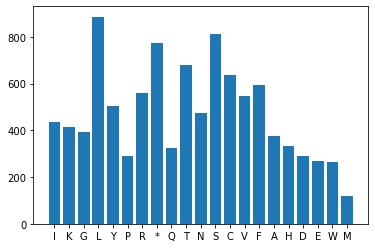

In [78]:
# Plot for COVID-19
plt.bar(covid_freq.keys(),covid_freq.values())

<BarContainer object of 21 artists>

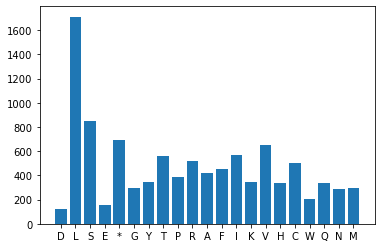

In [79]:
# Plot for MERS
plt.bar(mers_freq.keys(),mers_freq.values())

<BarContainer object of 21 artists>

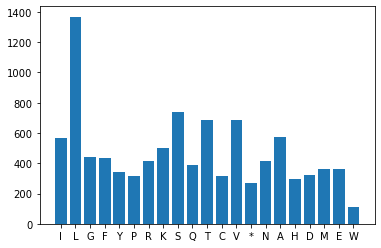

In [80]:
# Plot for SARSs
plt.bar(sars_freq.keys(),sars_freq.values())

<BarContainer object of 21 artists>

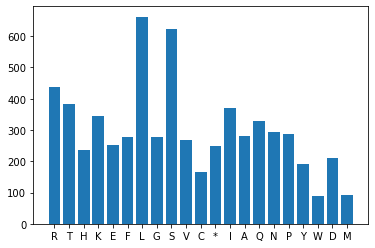

In [81]:
# Plot for Ebola 
plt.bar(ebola_freq.keys(),ebola_freq.values())

### Checking for molecular weights 
+ Removing the stop codon (* ~ indication) is needed to get the molecular weights of the sequences 

In [82]:
seq2 = ProteinAnalysis('IKGLYLPR')

In [83]:
# Checks the molecular weight of a sequence 
seq2.molecular_weight()

959.1858

### Dot Plotting - seeing the alignment between two sequences

In [85]:
len(covid_seq)

29903

In [88]:
# A comparison of the first 100 nucleotides between Covid and Sars
dotplot(covid_seq[0:100],sars_seq[0:100])

 |ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGC
------------------------------------------------------------------------------------------------------
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■        ■ ■          ■■■  ■■    ■■■■       ■             
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ ■   ■ ■ ■■ ■ ■        ■■■    ■ ■ ■ ■   ■ ■   ■    
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ ■   ■ ■ ■■ ■ ■        ■■■    ■ ■ ■ ■   ■ ■   ■    
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■        ■ ■          ■■■  ■■    ■■■■       ■             
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■        ■ ■          ■■■  ■■    ■■■■       ■             
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■        ■ ■          ■■■  ■■    ■■■■       ■             
G|      ■■              ■■    ■            ■       ■  ■    ■          ■             ■ ■  ■  ■  ■   ■■ 
G|      ■■              ■■    ■            ■       ■  ■    ■          ■  

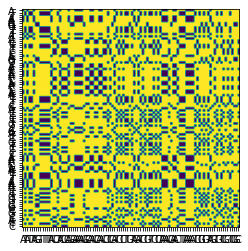

In [92]:
dotplotx(covid_seq[0:100],sars_seq[0:100]) # a diagonal line indicates a correlation between the two sequences 

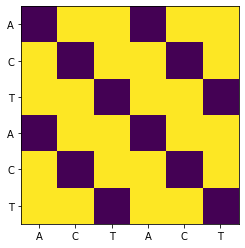

In [95]:
dotplotx('ACTACT','ACTACT')

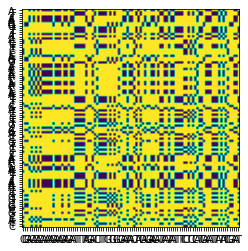

In [97]:
# A more advance graph comparing covid and ebola sequence 
dotplotx(covid_seq[0:100],ebola_seq[0:100])

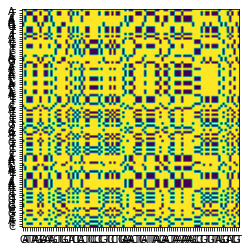

In [98]:
dotplotx(covid_seq[0:100],mers_seq[0:100])

In [115]:
# Pairwise alignment - passes in protein sequences | gives score only as a percentage, one_alignmnet_only=True gives the most optimal score
cov_n_sars = pairwise2.align.globalxx(covid_seq[0:100],sars_seq[0:100],one_alignment_only=True,score_only=True)

In [105]:
# Displays the score for similiarty between two sequences 
cov_n_sars

89.0

In [108]:
# The percentage of similiarty 
cov_n_sars/len(covid_seq[0:100]) * 100

89.0

In [110]:
cov_n_mers = pairwise2.align.globalxx(covid_seq[0:100],mers_seq[0:100],one_alignment_only=True,score_only=True)

In [111]:
cov_n_ebola = pairwise2.align.globalxx(covid_seq[0:100],ebola_seq[0:100],one_alignment_only=True,score_only=True)

In [113]:
# Displays the percentage of similarity for Covid compared to MERs, SARs, and Ebola
print('Covid/Mers:', cov_n_mers)
print('Covid/Sars:', cov_n_sars)
print('Covid/Ebola:', cov_n_ebola)

Covid/Mers: 71.0
Covid/Sars: 89.0
Covid/Ebola: 58.0


### 3-D structure of Sequences

In [117]:
# Importing pkgs for 3-D structure analysis 
from Bio.PDB import PDBParser, MMCIFParser

In [118]:
parser = PDBParser()

In [119]:
covid_structure = parser.get_structure("6LU7", "covid19-6lu7.pdb")
sars_structure = parser.get_structure("5xes", "sars-5xes.pdb")
ebola_structure = parser.get_structure("6hs4", "ebola-6hs4.pdb")

/Users/elvisyung/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  warnings.warn(
/Users/elvisyung/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7001.
  warnings.warn(
/Users/elvisyung/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7133.
  warnings.warn(
/Users/elvisyung/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7153.
  warnings.warn(
/Users/elvisyung/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7255.
  warnings.warn(


In [129]:
pip install nglview

  Using cached nglview-3.0.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [131]:
import nglview as nv

In [132]:
view_covid = nv.show_biopython(covid_structure)

In [133]:
view_covid

NGLWidget()

In [134]:
view_sars = nv.show_biopython(sars_structure)

In [135]:
view_sars

NGLWidget()

In [136]:
view_ebola = nv.show_biopython(ebola_structure)

In [137]:
view_ebola

NGLWidget()